In [1]:
import os
import json

import numpy
import matplotlib
from matplotlib import pyplot

from discohisto import limit

In [2]:
pyplot.rcParams.update(
    {
        "text.usetex": True,
        "font.family": "serif",
        "font.size": 10,
        "figure.facecolor": "w",
    }
)

21
(0, 30)
0.001


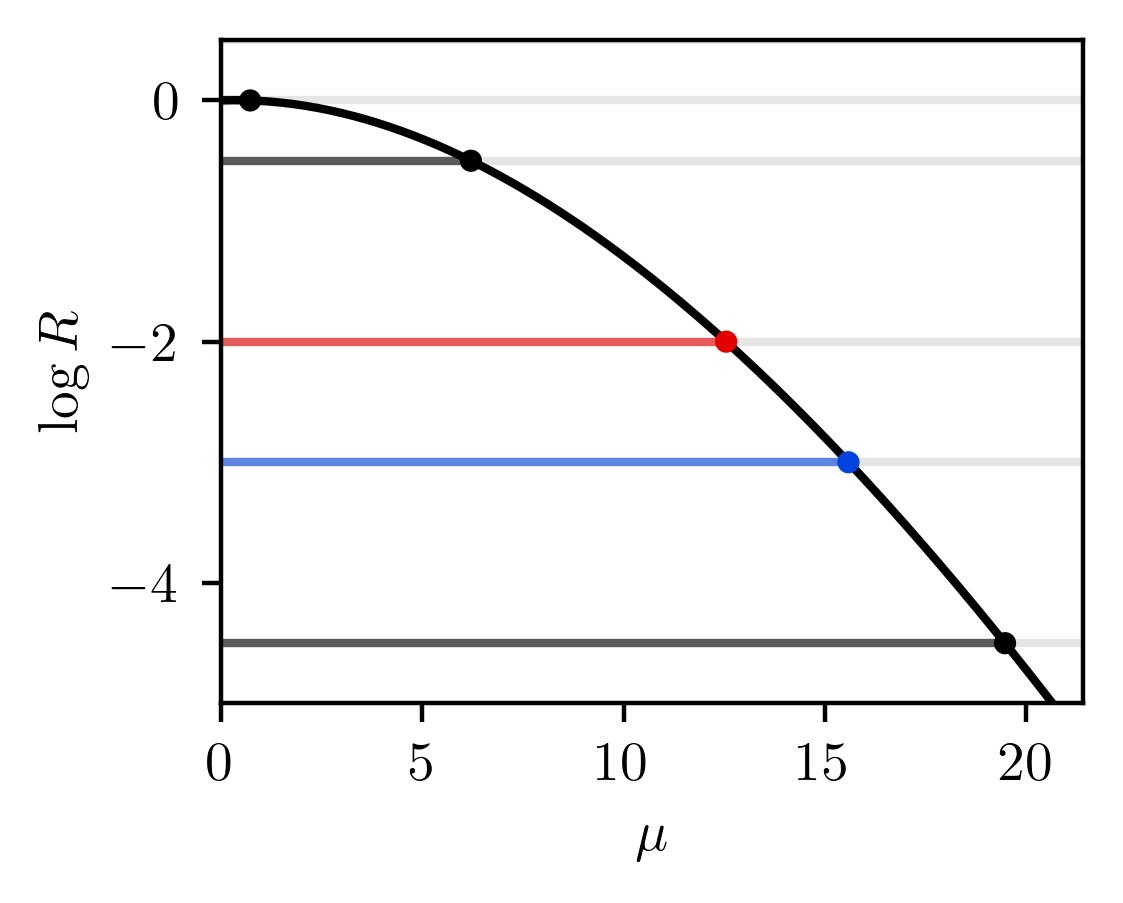

In [3]:
def plot_limit(search, region):
    limit_ = limit.LimitScan.load(
        f"/home/tombs/Cambridge/interval-evidence/searches/{search}/{region}/fit/limit",
        suffix="_cabinetry_observed",
    )
    
    print(limit_.ndata)
    print((limit_.start, limit_.stop))
    print(limit_.rtol)
    
    figure, axis = pyplot.subplots(
        dpi=400,
        figsize=numpy.array([4, 3]) * 0.7,
        gridspec_kw={
            "top": 0.99,
            "right": 0.97,
            "bottom": 0.2,
            "left": 0.2,
        },
    )
    
    zero = numpy.mean(limit_.integral_zero)
    lratio = numpy.mean(limit_.integrals, axis=1)
    llr = numpy.log(lratio) - numpy.log(zero)
    
    x = numpy.linspace(limit_.start, limit_.stop, len(llr))
    
    axis.plot(x, llr, "k")
    
    for level in limit_.levels:
        axis.axhline(level, color="k", alpha=0.1, zorder=0.5)
        
    limits_y = []
    limits_x = []
    limits_c = []
    for level, meets in zip(limit_.levels, limit_.points):
        if not meets:
            continue
        limits_x.append(meets[-1])
        limits_y.append(level)
        
        if len(meets) > 1:
            meets_start = meets[-2]
        else:
            meets_start = 0.
        
        if level == -2:
            color = "xkcd:red"
        elif level == -3:
            color = "xkcd:blue"
        else:
            color = "k"
        
        limits_c.append(color)
        
        axis.plot(
            [meets_start, meets[-1]],
            [level, level],
            color=color,
            alpha=0.6,
        )
        
    axis.scatter(
        limits_x,
        limits_y,
        zorder=2.5,
        color=limits_c,
        s=4 ** 2,
        lw=0,
    )
    
    axis.set_xlim(0, max(limits_x) * 1.1)
    axis.set_ylim(min(limits_y) - 0.5, max(llr) + 0.5)
    
    axis.set_xlabel(r"$\mu$")
    axis.set_ylabel(r"$\log R$")
    
    pyplot.show()


plot_limit("atlas_susy_2Ljets_2022", "ewk_offshell")

22
(0, 35)
0.001


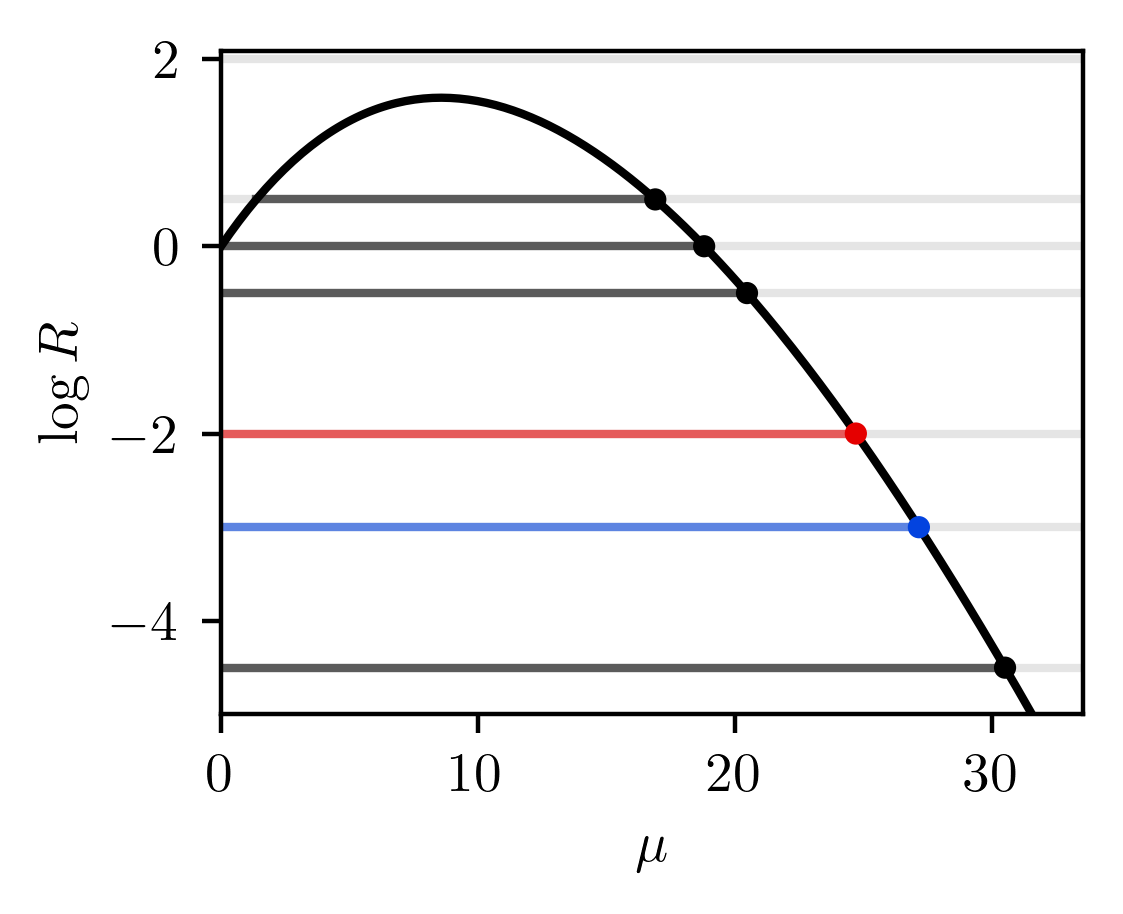

In [4]:
plot_limit("atlas_susy_1Ljets_2021", "SR2JBVEM_meffInc30_gluino")

1
(0, 30)
0.001


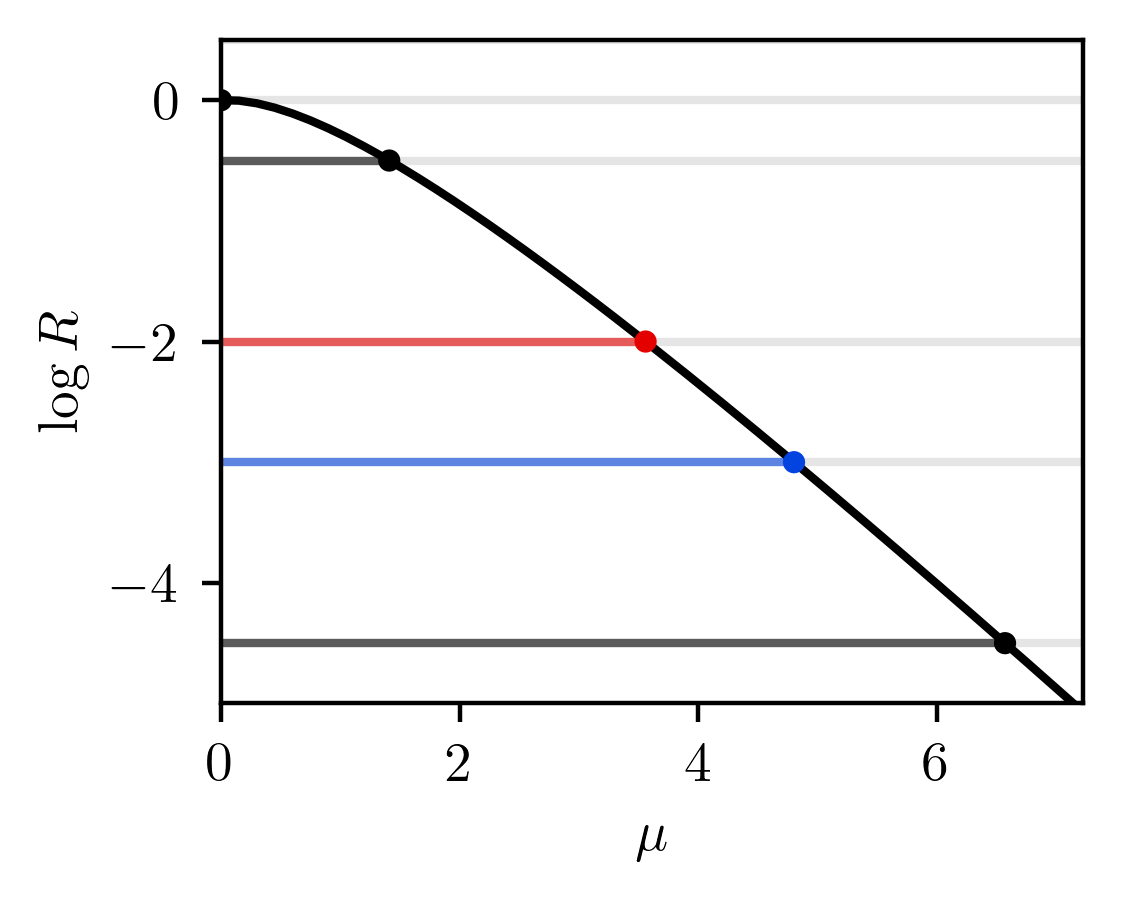

In [5]:
plot_limit("atlas_susy_4L_2021", "SR0ZZbvetotight")